# Group 2
## Kickstarter Data Science Project

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

'''
Instructions: youll need to put the exchange rate table "CurrencyTable" into the same folder as your
existing kickstarter file. The code that transforms the data takes forever finish - at least 3 mins.
'''

#change the path that the read_csv is looking at
df = pd.read_csv('CurrencyTable.csv',index_col=0)
df.index = pd.to_datetime(df.index)
new_index = pd.date_range(df.index.min(),df.index.max(),freq='MS')
df=df.reindex(new_index)
df=df.interpolate().unstack()
rate = pd.DataFrame(df)
rate.columns = ['rate']
rate.rename_axis(['currency','rtdate']).head()
#rate = df.interpolate().unstack().rename_axis(['currency','rtdate']).reset_index()

rate
currency rtdate              
AUD      2010-01-01  0.897274
         2010-02-01  0.896608
         2010-03-01  0.895943
         2010-04-01  0.895277
         2010-05-01  0.894612

In [2]:
#Import the data set into dataframe

tdf = pd.read_csv('ksdata.csv', index_col=0)

In [3]:
'''
Converting the dataset
'''

#Convert columns to datetime
tdf.launched = pd.to_datetime(tdf.launched)
tdf.deadline = pd.to_datetime(tdf.deadline)

#Drop the columns where the launch date is 1970 - 5 itmes total
tdf = tdf.drop(tdf[tdf.launched < '2000-01-01'].index)

#create a column that gives you the duration of the campaign in days
tdf['date_diff'] = tdf.deadline - tdf.launched
tdf.date_diff = tdf.date_diff.apply(lambda x: x.days)

#change the country code for N,0" error to first two letters of currency
tdf['country'] = np.where(tdf['country'] == 'N,0"',tdf.currency.str[:2],tdf['country'])

#create new column
tdf['funding_status'] = tdf.state

#change funding_status to either 'successful' or 'failed' based on pledged > goal
tdf['funding_status'] = np.where(tdf['usd_pledged_real'] >= tdf['usd_goal_real'], 'successful','failed')

#added a new column to dataframe that matches other dataframe for join
tdf['rtdate'] = tdf['launched'].values.astype('datetime64[M]')

#drop usd_goal_real and usd_pledged_real
tdf.drop(['usd_goal_real','usd_pledged_real','usd pledged'], axis=1, inplace=True)


In [4]:
result = tdf.join(rate, on=['currency', 'rtdate'], how='left')

In [5]:
result['goal_usd'] = result.goal * result.rate
result['pledged_usd'] = result.pledged * result.rate

In [6]:
result.head()


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,date_diff,funding_status,rtdate,rate,goal_usd,pledged_usd
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,58,failed,2015-08-01,1.527486,1527.485876,0.0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,59,failed,2017-09-01,1.000000,30000.000000,2421.0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,44,failed,2013-01-01,1.000000,45000.000000,220.0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,29,failed,2012-03-01,1.000000,5000.000000,1.0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,55,failed,2015-07-01,1.000000,19500.000000,1283.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

# Analysis

## Scope:
1. Main Categories
2. Backers
3. Goal 

In [8]:
#read data
dfraw = pd.read_csv('data_analysis.csv', index_col=0, encoding='utf-8-sig')

#There are projects undefined where  backers=0 but pledged > goal. We are going to drop them.
x = (dfraw['backers'] == 0 ) & (dfraw['successful'] == 1)
dfraw = dfraw.drop(dfraw[x].index)

# create a copy and drop no related columns
df = dfraw.drop(['name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'country', 'date_diff',
       'rtdate', 'rate', 'pledged_usd'], axis=1)
df.head()

,main_category,backers,successful,goal_usd
0,Publishing,0,0,1527.485876
1,Film & Video,15,0,30000.000000
2,Film & Video,3,0,45000.000000
3,Music,1,0,5000.000000
4,Film & Video,14,0,19500.000000


main_category    3109
backers          3109
successful       3109
goal_usd         0   
dtype: int64
             backers     successful      goal_usd
count  376894.000000  376894.000000  3.737850e+05
mean   106.112644     0.358939       4.677203e+04
std    909.280248     0.479690       1.182659e+06
min    0.000000       0.000000       1.000000e-02
25%    2.000000       0.000000       2.000000e+03
50%    12.000000      0.000000       5.500000e+03
75%    56.000000      1.000000       1.600000e+04
max    219382.000000  1.000000       1.529369e+08


C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


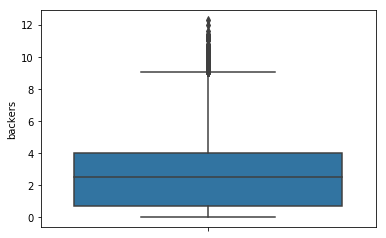

In [9]:
#there are 3117 null values in goal_usd --> we are going to drop them for the goal analysis
print(df[df.goal_usd.isnull()].count())

describe = df.describe()
print(describe)


sns.boxplot( y=np.log(df.backers))

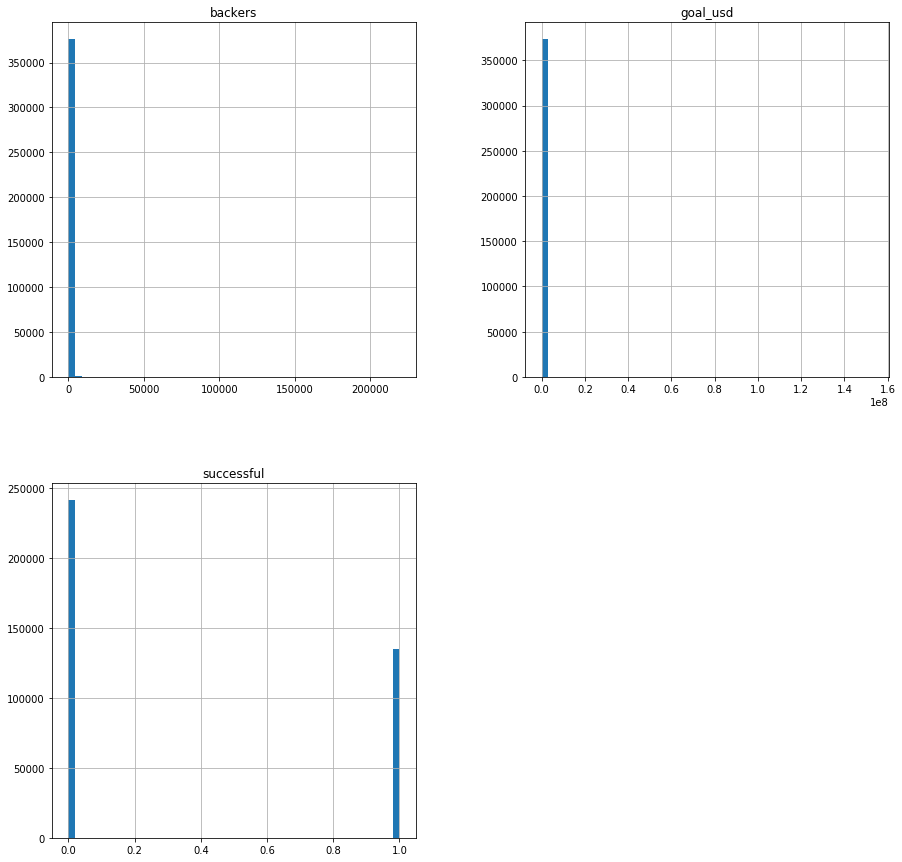

In [11]:
#plot histogram
df.hist(bins=50, figsize=(15,15));


## Main Categories

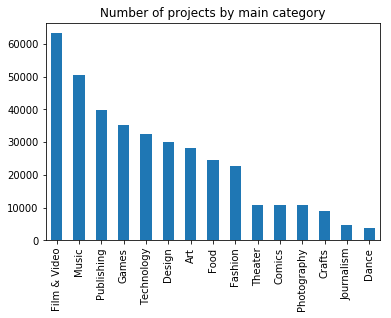

In [12]:
categories = df['main_category'].value_counts()
categories.plot.bar(title='Number of projects by main category');


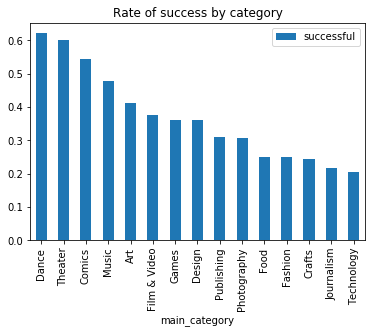

In [13]:
ratesuccess = df[['main_category', 'successful']].groupby(by='main_category').mean().sort_values(
    by='successful', ascending=False)


ratesuccess.plot.bar(title='Rate of success by category');

## Backers

count    376894.000000
mean     106.112644   
std      909.280248   
min      0.000000     
25%      2.000000     
50%      12.000000    
75%      56.000000    
max      219382.000000
Name: backers, dtype: float64


(<matplotlib.axes._subplots.AxesSubplot at 0x1fc2a932ef0>,)

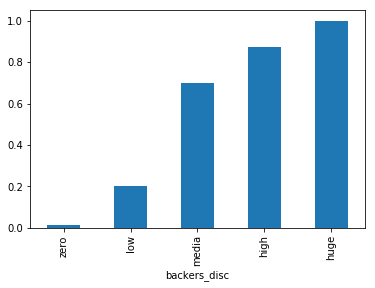

In [14]:
databackers = df[['backers', 'successful']]

print(databackers.backers.describe())

# discretized
nb = df.backers
bins = [0, 1, 30, 100, 10000, 300000]
group_names = ['zero','low', 'media','high', 'huge']
cats = pd.cut(nb, bins, labels=group_names)
pd.value_counts(cats)

df['backers_disc'] = cats
backers_rate = df[['backers_disc', 'successful']].groupby('backers_disc').mean()
backers_rate['n_proj'] = df[['backers_disc', 'successful']].groupby('backers_disc').count()
backers_rate

backers_rate['successful'].plot.bar(),

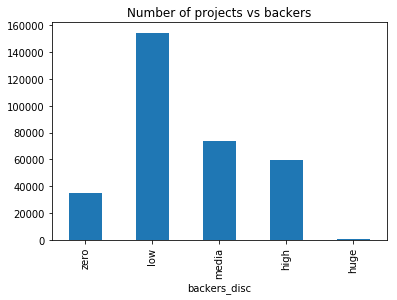

In [15]:
backers_rate['n_proj'].plot.bar(title='Number of projects vs backers')

In [17]:
backers = databackers.pivot_table(index = 'backers', columns='successful',aggfunc=np.size)
backers = backers.rename(columns= {1: 'Successful', 0:'Failed'})


# What is the number of backers that most success projects have?
backers[backers['Successful'] == backers['Successful'].max()]

successful,Failed,Successful
backers,,
19,3582.0,2714.0


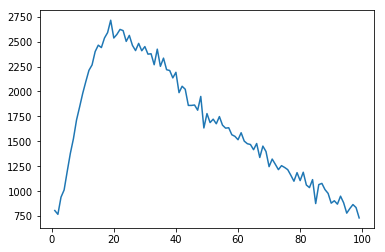

In [19]:
plt.plot(backers['Successful'][:100]);

## Goal

In [20]:
datagoal = df.copy()

print(datagoal.goal_usd.describe())

datagoal = datagoal.dropna(axis=0)

ng = datagoal.goal_usd
bins = [0, 2000, 10000, 100000, 1000000, 1.6e+08]
group_names = ['2K', '10K','100K','1M' ,'10B']
cats = pd.cut(ng, bins, labels=group_names)
pd.value_counts(cats)

datagoal['goal_bins'] = cats
goal_rate = datagoal[['goal_bins', 'successful']].groupby('goal_bins').mean()
goal_rate['n_proj'] = datagoal[['goal_bins', 'successful']].groupby('goal_bins').count()
goal_rate

count    3.737850e+05
mean     4.677203e+04
std      1.182659e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.600000e+04
max      1.529369e+08
Name: goal_usd, dtype: float64


,successful,n_proj
goal_bins,,
2K,0.571949,81773
10K,0.443966,131902
100K,0.289972,96806
1M,0.082641,9269
10B,0.015428,713


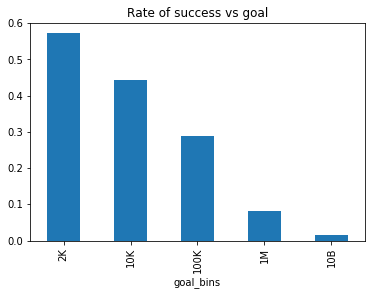

In [21]:
goal_rate['successful'].plot.bar(title='Rate of success vs goal');

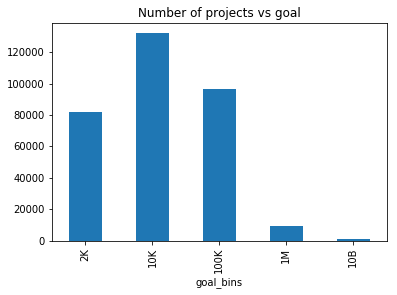

In [23]:
goal_rate['n_proj'].plot.bar(title='Number of projects vs goal');

In [24]:
import re

# Text mining
In this work I'm going to analyse the project names of KickStarter projects.

**I want to know if there is a correlation between the success of a project and the words used in its name.**

## Data preparation

In [25]:
#read data
df = pd.read_csv('data_textmining.csv', index_col=0, encoding='utf-8-sig')

# create a copy and drop no related columns
df = df.drop([ 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'date_diff', 'rtdate', 'rate', 'goal_usd', 'pledged_usd'], axis=1)
dfname = df.copy()

dfname.head()

,name,category,main_category,country,successful
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,0
2,Where is Hank?,Narrative Film,Film & Video,US,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,0
4,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,US,0


In [26]:
# make sure all names are string
dfname['name'] = dfname.name.astype(str)

# there are 23105  projects with (canceled) in the name
pattern = '\(canceled\)'
dfname['name'] = dfname.name.str.replace(pattern, '', n=1, case=False)

# there are 1060  projects with (suspended) in the name
pattern = '\(suspended\)'
dfname['name'] = dfname.name.str.replace(pattern, '', n=1, case=False)

#remove rare characters 
pattern = '[^A-Za-z0-9!? ]'
dfname['name'] = dfname.name.str.replace(pattern, '')

pattern = '\(\)'
dfname['name'] = dfname.name.str.replace(pattern, '')

#remove excess whitespace
for i in range(8):
    pattern = '  '
    dfname['name'] = dfname.name.str.replace(pattern, ' ')

# create new feature: name length
dfname['name_len'] = dfname.name.str.len()

# convert all to lowercase before split
dfname['name_low'] = dfname.name.str.lower()

# get rid of ? ! before split
pattern = '[!?]'
dfname['name_low'] = dfname.name_low.str.replace(pattern, '')

# drop empty names
dfname = dfname.drop(dfname[dfname.name_len == 0].index, axis=0)
dfname = dfname.drop(dfname[dfname.name == ' '].index, axis=0) 

# split each name by whitespace creating a list with words
dfname['name_words']  = dfname.name_low.str.strip().str.split('[\s]')

# create new feature: number of words in each name
dfname['number_words']  =  dfname.name_words.str.len()

print(dfname.name_words.isnull().sum())

dfname.head()

0


,name,category,main_category,country,successful,name_len,name_low,name_words,number_words
0,The Songs of Adelaide Abullah,Poetry,Publishing,GB,0,29,the songs of adelaide abullah,"[the, songs, of, adelaide, abullah]",5
1,Greeting From Earth ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,0,44,greeting from earth zgac arts capsule for et,"[greeting, from, earth, zgac, arts, capsule, for, et]",8
2,Where is Hank?,Narrative Film,Film & Video,US,0,14,where is hank,"[where, is, hank]",3
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,0,49,toshicapital rekordz needs help to complete album,"[toshicapital, rekordz, needs, help, to, complete, album]",7
4,Community Film Project The Art of Neighborhood Filmmaking,Film & Video,Film & Video,US,0,57,community film project the art of neighborhood filmmaking,"[community, film, project, the, art, of, neighborhood, filmmaking]",8


##  Keywords
### There are 15 main categories and the success rate is different between them.
** I want to find the most used words in successful projects in each category **

In [27]:
# create a safe copy
dfname2 = dfname.copy()

#Category: Music

dfmusic = dfname2[dfname2.main_category == 'Music']
dfmusic.head()

,name,category,main_category,country,successful,name_len,name_low,name_words,number_words
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,0,49,toshicapital rekordz needs help to complete album,"[toshicapital, rekordz, needs, help, to, complete, album]",7
11,Lisa Lim New CD!,Indie Rock,Music,US,1,16,lisa lim new cd,"[lisa, lim, new, cd]",4
18,Mike Coreys Darkness Light Album,Music,Music,US,1,32,mike coreys darkness light album,"[mike, coreys, darkness, light, album]",5
25,Matt Cavenaugh Jenny Powers make their 1st album!,Music,Music,US,1,50,matt cavenaugh jenny powers make their 1st album,"[matt, cavenaugh, jenny, powers, make, their, 1st, album]",8
34,Chris Eger Band New Nashville Record!,Music,Music,US,1,37,chris eger band new nashville record,"[chris, eger, band, new, nashville, record]",6


In [28]:
def splitwords(table):
    rows= list()
    for row in table[['successful', 'name_words']].iterrows():
        r = row[1]
        for word in r.name_words:
            rows.append((r.successful, word))
        
    words = pd.DataFrame(rows, columns=['successful', 'word'])
    return words

music_words = splitwords(dfmusic)
music_words.head()

,successful,word
0,0,toshicapital
1,0,rekordz
2,0,needs
3,0,help
4,0,to


In [29]:
words = music_words.copy()

# drop empty words
words = words.drop(words[words.word == ''].index, axis=0)

 # pivot table
count_words = words.pivot_table(index = 'word', columns='successful',aggfunc=np.size)

count_words = count_words.sort_values(1, ascending=False)
count_words.head()

successful,0,1
word,,
album,11360.0,16262.0
the,13324.0,15304.0
new,4626.0,8412.0
a,5170.0,5988.0
debut,3520.0,5864.0


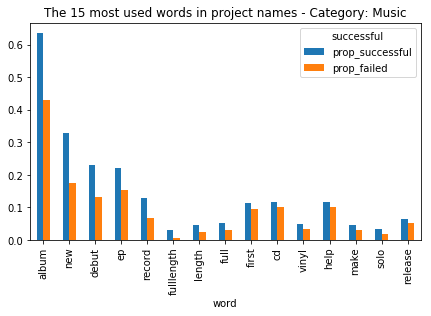

In [30]:
# create new features
n_successful = len(dfmusic[dfmusic.successful == 1])

n_failed = len(dfmusic[dfmusic.successful == 0])

count_words['prop_successful'] = count_words[1] / n_successful

count_words['prop_failed'] = count_words[0] / n_failed

count_words['diff'] = count_words['prop_successful'] - count_words['prop_failed']

# which words are more used in successful projects than in failed projects?
sorted_bydiff = count_words.sort_values(by='diff', ascending=False)
sorted_bydiff[:10]
#the is a connecting word, gives more information about a project

# drop some of the most common words in English (source: https://simple.wikipedia.org/wiki/Most_common_words_in_English)
most10 = ['the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'I', 'by', 'at', 'an', 'from', '1', '2', 'about', 
          'is', 'on', '2014', '3', '2013', 'their', 'for']
most100diff = sorted_bydiff[:111]

for row in most100diff.iterrows():
    if row[0] in most10:
        most100diff = most100diff.drop(row[0])

most15music = most100diff[:15]

plt.rc('figure', figsize=(7, 4))
most15diff = most100diff[['prop_successful', 'prop_failed']][:15]
most15diff.plot.bar(title='The 15 most used words in project names - Category: Music');

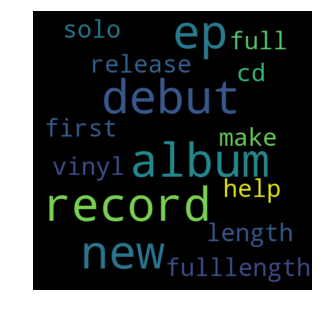

In [31]:
dfkey = dfmusic.copy()

dfkey['contain_kw'] = np.zeros(len(dfkey))

# define keywords to analize
keywords = ['album', 'new', 'debut', 'ep', 'record', 'fulllength', 'length', 'full',
       'first', 'cd', 'vinyl', 'help', 'make', 'solo', 'release']

# Libraries
from wordcloud import WordCloud
# Create the wordcloud object
key = ' '.join(keywords)
wordcloud = WordCloud(width=480, height=480, max_font_size=80, min_font_size=10).generate(key)
 
# Display the generated image:
plt.rc('figure', figsize=(5, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)


In [32]:
for word in keywords:
    dfkey['contain_kw'] = np.where(dfkey.name_low.str.contains(word),1 ,dfkey['contain_kw'])

dfkey.contain_kw = dfkey.contain_kw.astype(int)

dfkey[dfkey.contain_kw == 1] 

,name,category,main_category,country,successful,name_len,name_low,name_words,number_words,contain_kw
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,0,49,toshicapital rekordz needs help to complete album,"[toshicapital, rekordz, needs, help, to, complete, album]",7,1
11,Lisa Lim New CD!,Indie Rock,Music,US,1,16,lisa lim new cd,"[lisa, lim, new, cd]",4,1
18,Mike Coreys Darkness Light Album,Music,Music,US,1,32,mike coreys darkness light album,"[mike, coreys, darkness, light, album]",5,1
25,Matt Cavenaugh Jenny Powers make their 1st album!,Music,Music,US,1,50,matt cavenaugh jenny powers make their 1st album,"[matt, cavenaugh, jenny, powers, make, their, 1st, album]",8,1
34,Chris Eger Band New Nashville Record!,Music,Music,US,1,37,chris eger band new nashville record,"[chris, eger, band, new, nashville, record]",6,1
36,Arrows Sound Debut Album,Indie Rock,Music,US,1,24,arrows sound debut album,"[arrows, sound, debut, album]",4,1
39,Help Scott Reynolds Make a New Record!,Indie Rock,Music,US,1,38,help scott reynolds make a new record,"[help, scott, reynolds, make, a, new, record]",7,1
72,My Future Just Passed Debut CD Jazz Trio,Jazz,Music,US,1,40,my future just passed debut cd jazz trio,"[my, future, just, passed, debut, cd, jazz, trio]",8,1
83,Spiral Electric Skylab Recording,Rock,Music,US,1,32,spiral electric skylab recording,"[spiral, electric, skylab, recording]",4,1
93,Glyscian Debut Album Recording,Rock,Music,US,0,31,glyscian debut album recording,"[glyscian, debut, album, recording]",4,1


## Associations between binary variables
Successful and Contain keyword are binary variables. We want to see if there is a correlation between them.

In [33]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic

# create a table with only two binary variables
df = dfkey[['successful', 'contain_kw']]

# Make a crosstab
crosstabkw = pd.crosstab(index= df['contain_kw'], 
                         columns=df["successful"] )
                         
crosstabkw = crosstabkw.rename(index={0: 'No_KW', 1:'Yes_KW'} , columns= {1: 'Successful', 0:'Failed'})
crosstabkw

C:\Users\Jimena\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


successful,Failed,Successful
contain_kw,,
No_KW,13388,8723
Yes_KW,12966,16840


Text(0.5,1,'Mosaic graph: Successful / Contain Keyword')

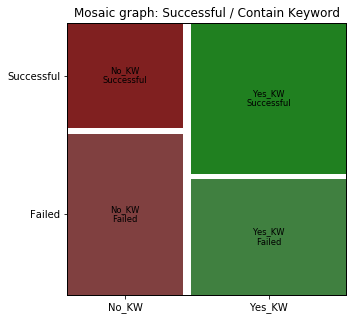

In [34]:
# create a mosaic graph 
plt.rc('figure', figsize=(5, 5))
mosaic(crosstabkw.stack(),gap=0.03 )
plt.title('Mosaic graph: Successful / Contain Keyword')


## Testing No-Correlation

An assertion that two variables are not related is based on a concept in statistics called the null hypothesis.

The null hypothesis in this case would state, **“There is no relationship between Keyword in a project name and Success of a project.”**

In a test for independence between Successful and Contain Keyword , if there is no relationship, then the null hypothesis is true. The alternative hypothesis is that the variables are in fact related – they are dependent, rather than independent.

The association between binary numbers can be interpreted the same way as the Pearson Correlation r. In fact, phi is a shortcut method for computing r.

In [35]:
import scipy.stats as stats
x = df.contain_kw
y = df.successful
stats.pearsonr(x, y)

(0.16861401161073444, 0.0)

**The p-value is 0 so we can reject the null hypothesis, the keywords in the names are related with the success of the projects.**

## Correlation between Keywords and Success is aprox 17%

# kNN 

In [ ]:
# saved the final dataframe to a new csv file
# changed some of the data types
# the original file was huge so I created a sample of the original data file - 57K sample
df = pd.read_csv('C:/Users/rm2019/PythonProjects/T1.csv',index_col=0)
df.launched = pd.to_datetime(df.launched)
df.deadline = pd.to_datetime(df.deadline)
df.rtdate = pd.to_datetime(df.rtdate)

from sklearn.model_selection import train_test_split

# split the data set into train and test
data = df[['backers','date_diff','goal_usd','name_length']]
y = df.pop('fs_binary')

x_train, x_test, y_train, y_test = train_test_split(data, y,test_size = 0.3)

# data set to test that the kNN is working
#d = {'a':[1,2,3],'b':[4,5,6],'c':[7,8,9],'d':[10,11,12],'e':[1,0,0]}
#e = {'a':[1],'b':[6],'c':[9],'d':[11]}
#dfd = pd.DataFrame(data=d)
#dfe = pd.DataFrame(data=e)
#lbl = dfd.pop('e')
#lbl_t = pd.DataFrame(lbl)
#df_test = pd.DataFrame(dfd[['a','b','c','d']].iloc[0]).T
#lbl_t = pd.DataFrame(lbl_t.iloc[0]).T

In [ ]:
y_test.head()

In [ ]:
# the distance formula defined
def distance(df1,df2,labels,k):
    dist_diff = np.sqrt(np.sum(np.square(df1-df2),axis=1))
    dist_diff.name = 'total_dist'
    diff = pd.concat([dist_diff, labels], axis=1)
    diff.sort_values(by='total_dist', axis=0, ascending=True, inplace=True)
    top_knn = diff[:k]
    return top_knn['fs_binary'].value_counts().index.values[0]

# apply the weighted sorted list to the test data
def main():    
    k = 7    
    result_df = x_test.apply(lambda row: distance(row,x_train,y_train,k), axis=1)    
    return result_df
#call to main for the testing
#def main():    
#    k = 2    
#    result_df = dfe.apply(lambda row: distance(row,dfd,lbl,k), axis=1)    
#    return result_df

In [ ]:
# assign the output to a dataframe
result = main()

# put the two dataframes together
comb = pd.concat([y_test, result], axis=1)

#rename the columns to original and caluculated
comb.columns = ['original','calculated']

# filter the data and take only those rows where original and calculated are the same
same = comb[comb.original == comb.calculated]
# calculate the percentage of those that are the same
same.count() / comb.count()